In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Olist E-commerce Clustered Data Analytics**

In [625]:
df = pd.read_csv('data/clustered_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.rename(columns={'customer_unique_id':'customer_id'}, inplace=True)

### **Cluster Density**
---

We need to understand the density of customer in each clusters such as purchasing behavior, transaction frequency, or average order value. 

In [626]:
segments = { 'Champions': 0, 'Loyal': 1, 'Potential Loyalist': 2, 'New Customers': 3, 'Promising': 4, 'Need Attention': 5, 
                'About To Sleep': 6, 'Cannot Lose Them':  7, 'At Risk': 8, 'Hibernating Customers': 9, 'Lost Customers': 10}

In [627]:
def add_needs(data, column):
    data['Needs']  = np.where(
    data[column].isin(['Champions', 'Loyal', 'Potential Loyalist', 'New Customers', 'Promising']),
    'Need Maintaining', 
    np.where(data[column].isin(['Need Attention', 'About To Sleep', 'Cannot Lose Them', 'At Risk']),
             'Need Attention',
             'Need Exposures'))

def add_percentage(data, column):
    data['%'] = (data[column]/sum(data[column])).round(4)

### **Cluster Customer Distributions**
---

To add more analysis, the clustered will be divided into three classification:

| Classification     | Description                                                                                           | Clusters                                                |
|-------------------- |-------------------------------------------------------------------------------------------------------|---------------------------------------------------------|
| Need Maintaining   | Customers that the company needs to appreciate, either already recurring or new with little experience.| Champions, Loyal, Potential Loyalist, New Customers, Promising |
| Need Attention     | Customers needing the most attention; potential to end the relationship or very valuable to retain.    | Need Attention, Cannot Lose Them, About To Sleep, At Risk  |
| Need Exposures      | Customers already lost; haven't made a transaction in a long time.                                      | Hibernating Customers, Lost Customers                     |


This classification can help the understanding of formulating actionable solutions towards the needs of the customer within the clusters.

In [628]:
clustered = df.groupby(by=['RFM_segment'])['customer_id'].count().to_frame().reset_index()
clustered['order'] = clustered['RFM_segment'].map(segments)
clustered.set_index('order', inplace=True)
clustered = clustered.sort_index()
add_percentage(clustered, 'customer_id')

In [629]:
add_needs(clustered, 'RFM_segment')
clustered.sort_values(by='customer_id', ascending=False)

,RFM_segment,customer_id,%,Needs
order,,,,
4,Promising,33357,0.3654,Need Maintaining
3,New Customers,17939,0.1965,Need Maintaining
7,Cannot Lose Them,17708,0.1940,Need Attention
10,Lost Customers,7552,0.0827,Need Exposures
9,Hibernating Customers,7470,0.0818,Need Exposures
6,About To Sleep,7184,0.0787,Need Attention
8,At Risk,45,0.0005,Need Attention
5,Need Attention,29,0.0003,Need Attention
0,Champions,2,0.0000,Need Maintaining


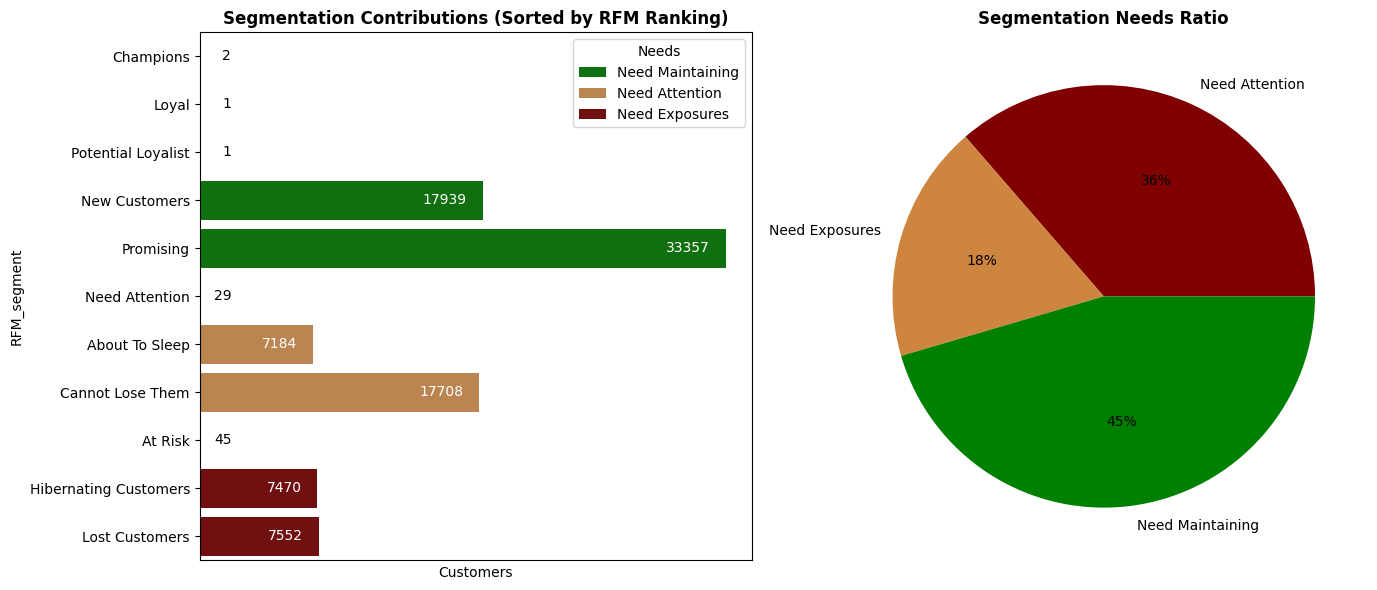

In [630]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

bar = sns.barplot(y=clustered['RFM_segment'], x=clustered['customer_id'], hue=clustered['Needs'], palette=['green','peru', 'maroon'], ax=axs[0])
axs[0].set_xticks([])
axs[0].set_title('Segmentation Contributions (Sorted by RFM Ranking)', fontweight='bold')
axs[0].set_xlabel('Customers')

for bar in bar.patches[0:-3]:
    y = bar.get_width()
    if y < 100:
        axs[0].text(y + 2000, (bar.get_y() + bar.get_height()/2), f'{int(y)}', ha='right', va='center', fontsize=10, color='black')
    else:
        axs[0].text(y - 1000, (bar.get_y() + bar.get_height()/2), f'{int(y)}', ha='right', va='center', fontsize=10, color='white')

needs_ratio = clustered.groupby(by=['Needs']).count()['%'] # make a needs ration variable
axs[1].pie(needs_ratio, autopct='%2.f%%', labels=needs_ratio.index, colors=['maroon','peru','green'])
axs[1].set_title('Segmentation Needs Ratio', fontweight='bold')

plt.tight_layout()
plt.show()

`Findings`
- The distributions of the customer's RFM behavior are mainly in 6 clusters, ***New Customers, Promising, About to Sleep , Cannot Losse Them, Hibernating Customers and Lost Customers*** with rest are taking less than 1% proportions. 

`Recommendations`
- The company can make their customer acquisitions strategy more efficient by understanding the contributions of each clusters into their revenue or business operations.
- For a more focused analysis, we are going to eliminate the clusters with a customer numbers below 1000. Leaving the main 6 clusters for further analysis.

In [631]:
df_6_clusters = df[df['RFM_segment'].isin(['New Customers', 'Promising', 'About To Sleep', 'Cannot Lose Them','Hibernating Customers','Lost Customers'])]

### **Cluster Average Monetary Value Distributions**
---

As we have understand the distributions of customer number in each clusters, we can further analyze the main clusters, we can use the **monetary** value to assess their contribution to the company's revenue.

In [632]:
clusters_monetary = df_6_clusters.groupby(by='RFM_segment')['monetary'].mean().to_frame().reset_index()
clusters_monetary['order'] = clusters_monetary['RFM_segment'].map(segments)
clusters_monetary.set_index('order', inplace=True)
clusters_monetary.sort_index(inplace=True)
add_needs(clusters_monetary, 'RFM_segment')

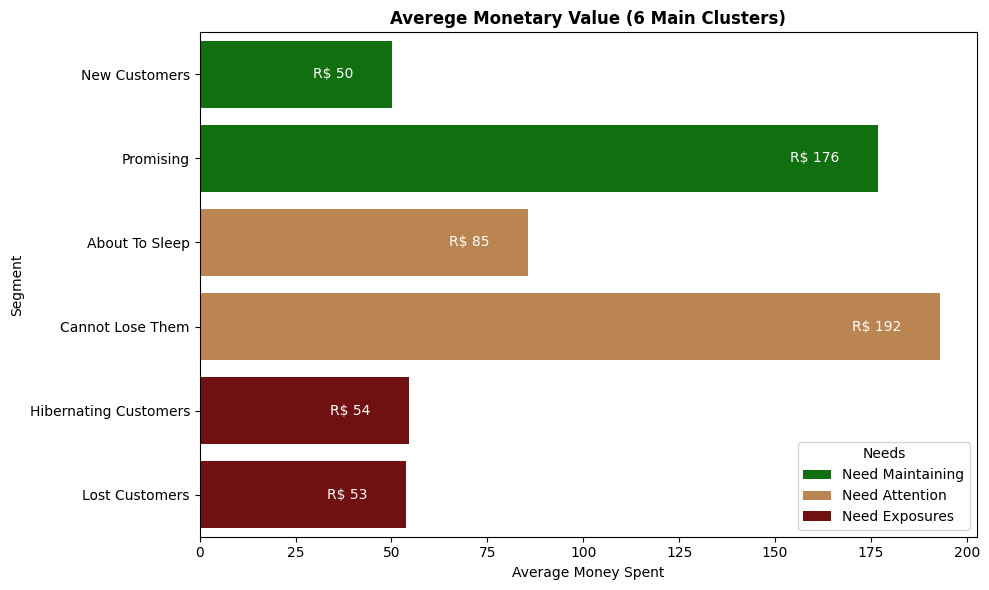

In [633]:
plt.figure(figsize=(10, 6))

bar = sns.barplot(y=clusters_monetary['RFM_segment'], x=clusters_monetary['monetary'], hue=clusters_monetary['Needs'], palette=['green','peru', 'maroon'])
plt.xlabel('Average Money Spent')
plt.ylabel('Segment')
plt.title('Averege Monetary Value (6 Main Clusters)', fontweight='bold')

for bar in bar.patches[0:-3]:
    y = bar.get_width()
    plt.text(y - 10, (bar.get_y() + bar.get_height()/2), f'R$ {int(y)}', ha='right', va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

`Findings`
- Although the **'Need Maintaining'** covered the most in terms of customer numbers, it turns out that on average the **'Need Attention'** class generates more revenue, making it equally or more important. while the **'Need Exposures'** have the smallest average monetary value total.

`Recommendations`
- The company can make their customer acquisitions strategy more efficient by understanding the contributions of each clusters into their revenue or business operations.
- This means that the company can focus on allocating their invemstent to maintaining the customers in the **'Need Attention'** and **'Need Attention'** clusters since they have higher monetary contributions and customer count.

In [634]:
main_4 = ['New Customers', 'Promising', 'About To Sleep', 'Cannot Lose Them']
df_4 = df[df['RFM_segment'].isin(main_4)]

### **Understanding RFM Metric for Main Clusters**
---

As we are using the RFM method to clusters our data, let's understand the characteristics of our 4 main clusters in RFM terms.

**Frequency**


In [635]:
df_4.groupby('RFM_segment')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_segment,,,,,,,,
About To Sleep,7184.0,1.014477,0.119453,1.0,1.0,1.0,1.0,2.0
Cannot Lose Them,17708.0,1.039756,0.195391,1.0,1.0,1.0,1.0,2.0
New Customers,17939.0,1.003958,0.062789,1.0,1.0,1.0,1.0,2.0
Promising,33357.0,1.047157,0.221656,1.0,1.0,1.0,1.0,3.0


 **Recency**


In [636]:
df_4.groupby('RFM_segment')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_segment,,,,,,,,
About To Sleep,7184.0,320.867901,57.644153,230.0,271.0,320.0,367.0,435.0
Cannot Lose Them,17708.0,461.966851,94.226581,320.0,380.0,459.0,531.0,774.0
New Customers,17939.0,167.702659,71.509498,48.0,106.0,167.0,220.0,319.0
Promising,33357.0,184.556765,76.274516,1.0,119.0,184.0,249.0,319.0


**Monetary Value**


In [637]:
df_4.groupby('RFM_segment')['monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_segment,,,,,,,,
About To Sleep,7184.0,85.609943,20.359648,53.99,67.500,84.12,103.3075,124.52
Cannot Lose Them,17708.0,192.992214,86.971178,83.80,130.325,166.68,233.6625,475.35
New Customers,17939.0,50.117063,16.858574,9.59,36.940,48.19,63.8800,83.75
Promising,33357.0,176.873730,84.324791,83.76,113.480,152.50,212.5600,475.45


`Findings`

- **Promising:**  mainly consists of customers who recently made purchases, exhibit moderate frequency, and have a high spending value.
- **New Customers:**  mainly consists of customers who have recently started shopping.
- **Cannot Lose Them:** mainly consists of customers who haven't made purchases for a while, have low frequency, but maintain a high spending value.
- **About To Sleep:**  mainly consists of customers who is on the verge of exit, still contribute to a reasonable monetary rate but on the edge of leaving.

`Recommendation`

These informations can be used to understand the right actionable decision towards investing in customer acquisition from each clusters.

- **Promising**: Offer coupons and ads to maintain their interest of the platform.
- **New Customers**: Build relationship, the admin can start conversation and facilitate them with benefits, really show them the value propositions of the platform and why they 
- **About to Sleep**: Advertise to them in a very personalize matter, understand their product interest and create promotions. The platform can also conduct survey to understand the reason behind the declining interest.
- **Cannot Lose Them**: This is the cluster where the company NEED to build strong relationships. Focus on winning them through products and promotions. Get admins to talk to them and build relationships. Allocate time and money into making them a recurring customer.

### **Cluster Product Analysis**
---

The main reason of this analysis, is how to sell more product to more customers. Hence, it is important to understand the clusters behaviour towards product selecting.

In [638]:
customer_data = pd.read_csv('data/olist_cleaned_dataset.csv')
customer_data['customer_id'] = customer_data['customer_unique_id']
customer_data.drop(columns=['customer_unique_id'], inplace=True)

In [639]:
# merge
product_data = pd.merge(df_4,customer_data[['customer_id', 'product_category_name']], how='left',on='customer_id')

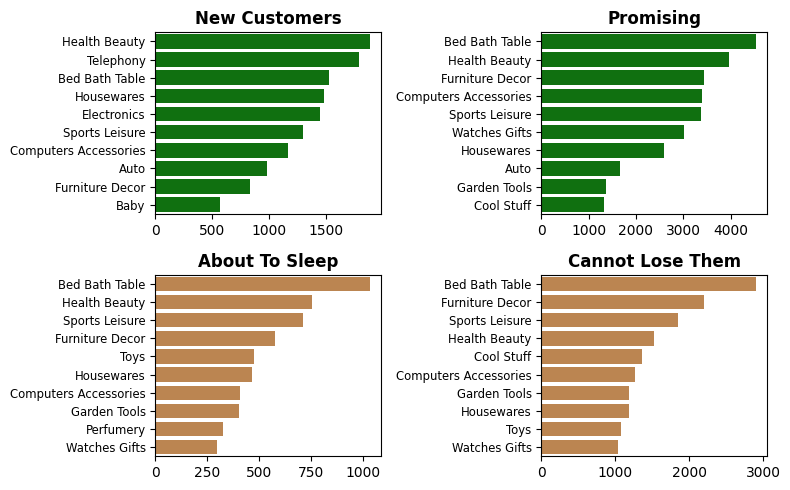

In [640]:
fig, axs = plt.subplots(2, 2, figsize=(8,5))

color = ['green','green','peru','peru']

for idx, cluster in enumerate(main_4):
    ax = axs[idx // 2, idx % 2]  
    data = product_data[product_data['RFM_segment'] == cluster].groupby(['product_category_name']).count()['customer_id'].sort_values(ascending=False).to_frame().head(10)

    sns.barplot(y=data.index, x=data['customer_id'], ax=ax, color=color[idx])
    ax.set_yticklabels(ax.get_yticklabels(), size=8.4)
    ax.set_title(f'{cluster}', fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

`Findings`
- Except for the *New Customers* cluster, **Bed Bath Table** constantly emerges the top selling products in each clusters. This indicates a universal trends towards a specific customer segments. This product category seems to be a popular choice for a broad range of customers.
- But the other items in the top 10 of each clusters shows versatile results. Understanding the diverse product preferences within each cluster is essential for creating targeted marketing strategies.

`Recommendations`
- Analyzing the preferences within each cluster could shows valuable insights for formulating targeted marketing strategies based on the specific product preferences of the customer segments.
- By aligning promotions, discounts, and product recommendations with the identified preferences of each cluster, the company can enhance its relevance to customers, leading to higher engagement and potentially increased sales.

### **Cluster Location Analysis**
---

In [641]:
# merge
city_data = pd.merge(df_4,customer_data[['customer_id', 'customer_city']], how='left',on='customer_id')
city_data.head()

,customer_id,last_order,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_segment,cluster,customer_city
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,161,1,141.90,4,1,4,414,Promising,4,Cajamar
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,164,1,27.19,4,1,1,411,New Customers,1,Osasco
2,0000f46a3911fa3c0805444483337064,2017-03-10,587,1,86.22,1,1,3,113,Cannot Lose Them,2,Sao Jose
3,0004aac84e0df4da2b147fca70cf8255,2017-11-14,338,1,196.89,2,1,5,215,Cannot Lose Them,4,Sorocaba
4,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05,196,1,166.98,4,1,4,414,Promising,4,Sao Paulo


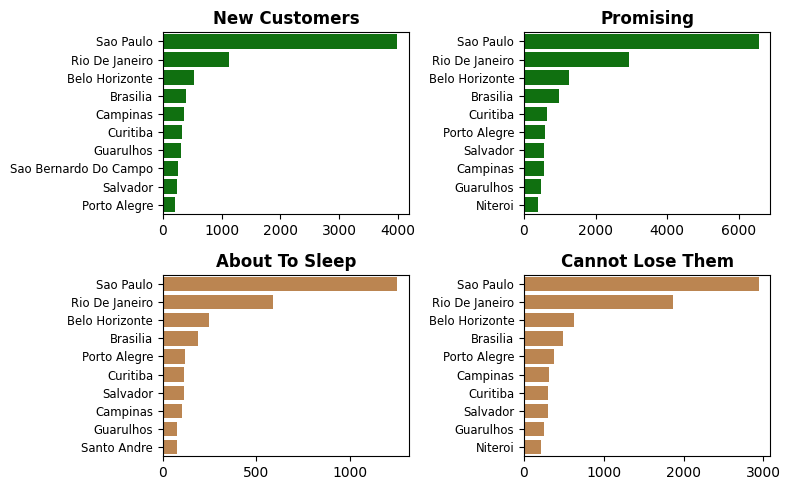

In [642]:
fig, axs = plt.subplots(2, 2, figsize=(8,5))


for idx, cluster in enumerate(main_4):
    ax = axs[idx // 2, idx % 2] 
    data = city_data[city_data['RFM_segment'] == cluster].groupby(['customer_city']).count()['customer_id'].sort_values(ascending=False).to_frame().head(10)

    sns.barplot(y=data.index, x=data['customer_id'], ax=ax, color=color[idx])
    ax.set_yticklabels(ax.get_yticklabels(), size=8.4)
    ax.set_title(f'{cluster}', fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

`Findings`:
- Sao Paolo emerges as the city with the top number of Olist customers.  
- Most of the top 10 city with customer number are similar, meaning that the location distributions are still central towards  a certain locations.
- This concentration implies that Olist's customer demographic is narrow only in key areas, possibly indicating strategic market penetration or higher demand in specific geographic regions.

`Recommendations`:
- Use the strong presence in Sao Paulo and similar top cities by doing targeted marketing specifically to these regions, considering local preferences and trends.
- Explore opportunities for strategic expansion in areas with high customer concentration, capitalizing the already established demand and market penetration.
- Tuning product offerings based on the preferences identified in top cities, ensuring that the product fit are aligned with the specific demand and interests of the customer demographic.


### **Cluster Payment Method Analysis**
---

In [643]:
# merge
payment_data = pd.merge(df_4,customer_data[['customer_id', 'payment_type']], how='left',on='customer_id')
payment_data.head()

,customer_id,last_order,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_segment,cluster,payment_type
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,161,1,141.90,4,1,4,414,Promising,4,credit_card
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,164,1,27.19,4,1,1,411,New Customers,1,credit_card
2,0000f46a3911fa3c0805444483337064,2017-03-10,587,1,86.22,1,1,3,113,Cannot Lose Them,2,credit_card
3,0004aac84e0df4da2b147fca70cf8255,2017-11-14,338,1,196.89,2,1,5,215,Cannot Lose Them,4,credit_card
4,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05,196,1,166.98,4,1,4,414,Promising,4,credit_card


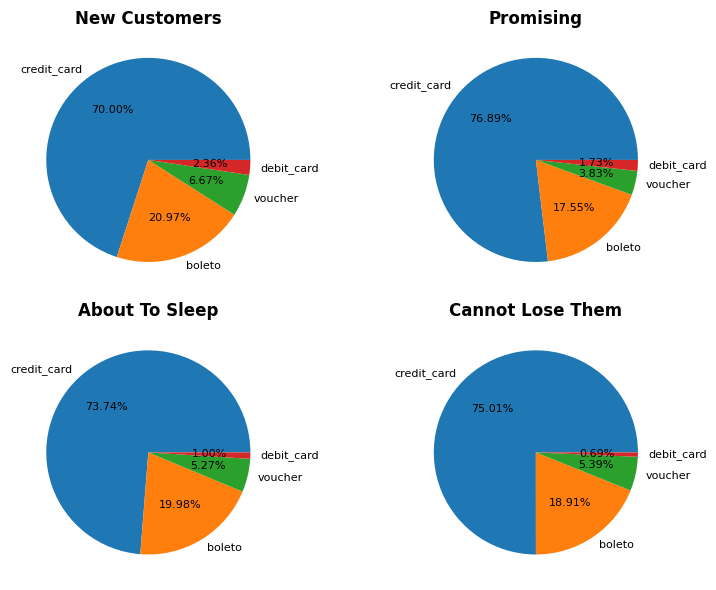

In [644]:
fig, axs = plt.subplots(2, 2, figsize=(8,6))

for idx, cluster in enumerate(main_4):
    ax = axs[idx // 2, idx % 2] 
    data = payment_data[payment_data['RFM_segment'] == cluster].groupby(['payment_type']).count()['customer_id'].sort_values(ascending=False).head(10)

    ax.pie(data, labels=data.index, autopct='%.2f%%', textprops={'fontsize': 8})
    ax.set_title(f'{cluster}', fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

`Findings`:
- Across the main four customer clusters, it is concluded that the preferred choices of payment methods are consistently **credit card and boleto.** These two methods emerge as the primary preferences among customers in all clusters.

`Recommendation`:
- With this information, the company can use this information to develop programs or promotional campaigns specifically targeted for customers who uses these preferred payment method
- By creating specialized incentives or loyalty programs, the company aims to further attract the purchasing power of customers.
- In the end, paying attention to what payment methods customers like can really help the company's marketing efforts. This could mean happier customers and possibly more people choosing to buy from the company.

### **Cluster Review Analysis**
---

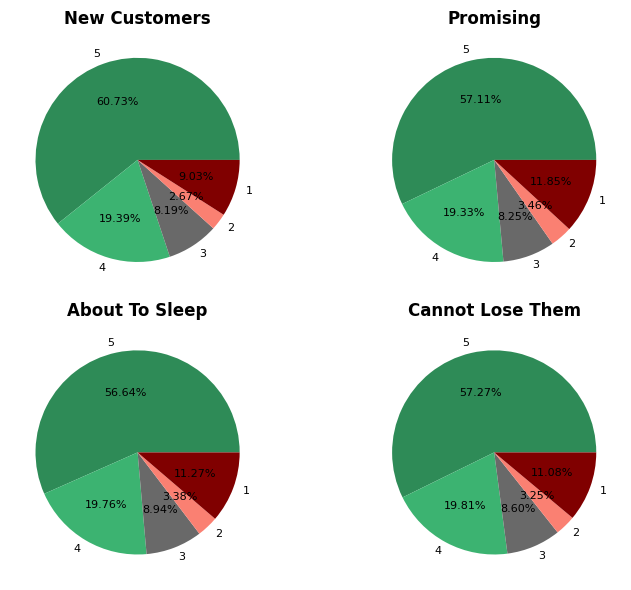

In [645]:
fig, axs = plt.subplots(2, 2, figsize=(8,6))

color = ['seagreen','mediumseagreen','dimgrey','salmon','maroon']

for idx, cluster in enumerate(main_4):
    ax = axs[idx // 2, idx % 2] 
    data = review_clusters[review_clusters['RFM_segment'] == cluster].groupby(['review_score']).count()['customer_id'].sort_index(ascending=False).head(10)

    ax.pie(data, labels=data.index, autopct='%.2f%%', textprops={'fontsize': 8}, colors=color)
    ax.set_title(f'{cluster}', fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

`Recommendation`:
- Considering the prevalence of 5-star reviews across all four clusters and the similar distribution patterns, the company can leverage this positive sentiment to enhance its brand reputation and customer satisfaction further. 
- Despite not being the majority, but the below 3-star reviews take more than 20% in most of the clusters, this should not be ignored since it can contirbute to a higher churn rate, company can use the bad review to improve their services and product filtering process in the future, maintaining brand reputations and customer satisfactions in the process.

## **Summary**

**On Clusters Distributions:**

---

- Using the RFM method, the whole customer are divided to 11 clusters. The cluster density however shows that the customers are mainly classified into 6 main clusters. That is:
***New Customers, Promising, About to Sleep , Cannot Losse Them, Hibernating Customers and Lost Customers*** with the rest of the clusters only showing numbers of customer below 100.

- After using the density to filter the clusters, the remaining clusters are going to be analyzed using the `monetary` metric. To understand how each of the customers in the clusters contribute to the company cash flows. This filtering conclude that in terms of monetary value there are only four clusters that has a high contributions to the overall transactions value.

- After the filtering process, the analysis are focusing on 4 main clusters: **New Customers, Promising, About to Sleep,** and **Cannot Lose Them** clusters.


**On Clusters Needs Strategy:**

---


These informations can be used to understand the right actionable decision towards investing in customer acquisition from each clusters.

- **Promising:** Offer targeted coupons and personalized advertisements to incentivize continued engagement. Utilize the customer preference data to target promotions and keep them actively involved with the platform. 

- **New Customers:** Initiate conversations through dedicated admins to welcome and guide new customers. Highlight the platform's unique value propositions, benefits, and offerings. Provide personalized benefits to demonstrate the immediate value of being a part of the platform.

- **About to Sleep:** Launch targeted advertising campaigns based on individual product interests. Conduct surveys to understand the reasons behind declining interest and tailor promotions accordingly. Use personalized communication to show that the platform values their preferences and is committed to addressing their needs.

- **Cannot Lose Them:** Allocate resources to interact with customers in this cluster. Deploy admins to engage in meaningful conversations, understand their preferences, and address any concerns. Develop exclusive promotions and product offerings to win them back. Invest time and money in making them feel valued and appreciated as recurring customers.



**Continuous monitoring and adjustment of strategies will be crucial for maintaining a healthy customer base.**

**On Clusters Products Analysis:**

---
- The analysis reveals a consistent trend with Bed Bath Table as the top-selling product across clusters, suggesting a universal appeal. However, the versatility in the top 10 products of each cluster underscores the importance of understanding diverse product preferences within specific customer segments.

- To capitalize on these findings, the company is advised to analyze preferences within each cluster for targeted marketing. Aligning promotions and discounts with identified preferences can enhance customer relevance, fostering higher engagement and potentially driving increased sales. This customer-centric approach allows the company to cater effectively to diverse preferences while leveraging the popularity of universal trends, such as the appeal of Bed Bath Table.

- For more information on the product, the company can use the function made in [Recommendation System](recommendation_system.ipynb).